<a href="https://colab.research.google.com/github/yiwenff/RShub_demo/blob/main/Run_Total_RTE_Veg_from_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform vs. Layered Vegetation Brightness Temperature

In [2]:
import datetime
!pip install https://rshub.zju.edu.cn/projects/rstool-0.0.tar.gz -q

## How would vertical distribution of vegetation structure impact Tb?

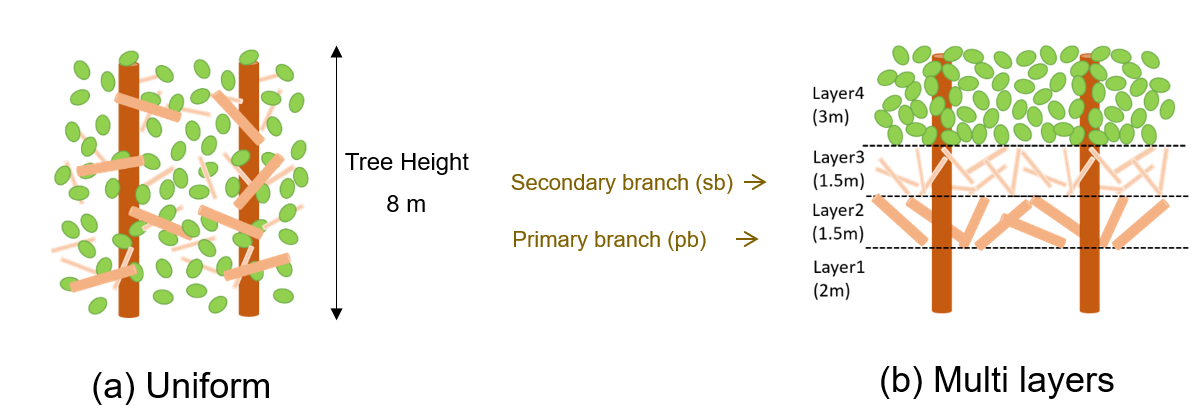

In [1]:
# Define user token
token = '6uf0z22#$m!!0095xo**1vy1s*04k!'
project_name = 'Vegetation Demo'
task1_name = 'Uniform Vegetation'
task2_name = 'Layered Vegetation'

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 3

# Step 2: Define observation description
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 2

# 2) Observation characteristics
fGHz = [1.41]

# Step 3: Define Algorithm flag
# 1: RT
algorithm = 1

In [4]:
# Step 4: Describe your scenario
# Case 1: Uniformed Vegetation 
scatters1=[[]]
# Primary Branch
types = 1
VM = 0.37
L = 7.85
D = 0.15
beta1 = 0
beta2 = 0
disbot = 0
distop = 8
NA = 0.24
scatters1[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]


# Case 2: Layered Vegetation
scatters2=[[]]
# Primary Branch
types = 1
VM = 0.37
L = 7.85
D = 0.15
beta1 = 0
beta2 = 0
disbot = 0
distop = 8
NA = 0.24
scatters2[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]

# Leaf
types = 1
VM = 0.444
L = 0.555
D = 0.0112
beta1 = 35
beta2 = 90
disbot = 8
distop = 8
NA = 0.24
scatters2.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])
print(scatters2)

[[1, 0.37, 7.85, 0.15, 0, 0, 0, 8, 0.24], [1, 0.444, 0.555, 0.0112, 35, 90, 8, 8, 0.24]]


In [5]:
data1 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters1,'core_num':2,
    'project_name':project_name,
    'task_name':task1_name,
    'token': token,
    'level_required':1
}

data2 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters2,'core_num':2,
    'project_name':project_name,
    'task_name':task2_name,
    'token': token,
    'level_required':1
}

## Run models

In [6]:
from rstool import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": 3, "output_var": 2, "fGHz": [1.41], "algorithm": 1, "scatters": [[1, 0.37, 7.85, 0.15, 0, 0, 0, 8, 0.24]], "core_num": 2, "project_name": "Vegetation Demo", "task_name": "Uniform Vegetation", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}
{"scenario_flag": 3, "output_var": 2, "fGHz": [1.41], "algorithm": 1, "scatters": [[1, 0.37, 7.85, 0.15, 0, 0, 0, 8, 0.24], [1, 0.444, 0.555, 0.0112, 35, 90, 8, 8, 0.24]], "core_num": 2, "project_name": "Vegetation Demo", "task_name": "Layered Vegetation", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}


In [13]:
print(result2)

{"model":"Vegetation Passive Radiative Transfer (VPRT) Model","outpath":"6jxRoNhbn1l7sCXVeCgz31wrlF9SBg","result":"Job submitted! Check Email for details."}



In [7]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task1_name} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task2_name} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Post Process

In [8]:
from rstool.load_file import load_mat_file

In [10]:
mat_data1 = load_mat_file(token, project_name, task1_name,'1.41')
mat_data_multi = mat_data1.load_veg_TB()
# Read variables into python
TU_all = mat_data_multi['TU_all'] # Tbs
theta_obs = mat_data_multi['theta_obs'] # theta

https://rshub.zju.edu.cn/projects/b6HfU4IPmJXgQzInynElgRMjAY2MdU/TB/TB_fGHz1.41.mat


In [14]:
mat_data2 = load_mat_file(token, project_name, task2_name,'1.41')
mat_data_multi2 = mat_data2.load_veg_TB()
# Read variables into python
TU_all2 = mat_data_multi2['TU_all'] # Tbs
theta_obs2 = mat_data_multi2['theta_obs'] # theta

https://rshub.zju.edu.cn/projects/6jxRoNhbn1l7sCXVeCgz31wrlF9SBg/TB/TB_fGHz1.41.mat
Failed to download the file


TypeError: 'NoneType' object is not subscriptable

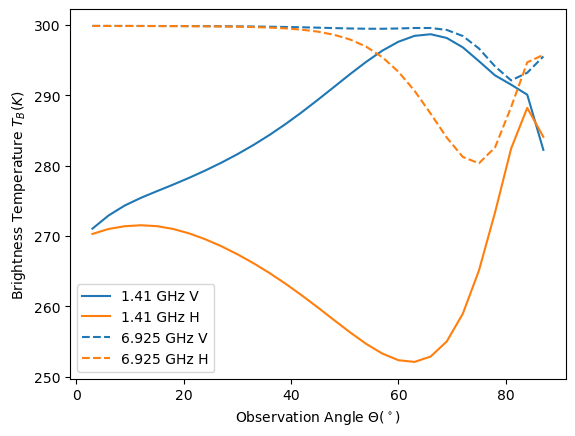

In [26]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs[0,:], TU_all[0,:], color='tab:blue')
ax.plot(theta_obs[0,:], TU_all[1,:], color='tab:orange')
ax.plot(theta_obs2[0,:], TU_all2[0,:], color='tab:blue',linestyle='--')
ax.plot(theta_obs2[0,:], TU_all2[1,:], color='tab:orange',linestyle='--')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['1.41 GHz V', '1.41 GHz H', '6.925 GHz V', '6.925 GHz H'])